<a href="https://colab.research.google.com/github/Masoud0389/Steady_State/blob/main/MLP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [165]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [166]:
data = pd.read_csv("DATASET1.csv")
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [179]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, shuffle=True)

In [180]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
X_train_scaled = normalize(X_train)
X_test_scaled = normalize(X_test)
X_tr = normalize(X_train_scaled)
X_te = normalize(X_test_scaled)
X_te = pd.DataFrame(X_te)
X_tr = pd.DataFrame(X_tr)

In [175]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_train_principal = pca.fit_transform(X_tr)
X_train_principal = pd.DataFrame(X_tr)
X_test_principal = pca.fit_transform(X_te)
X_test_principal = pd.DataFrame(X_te)

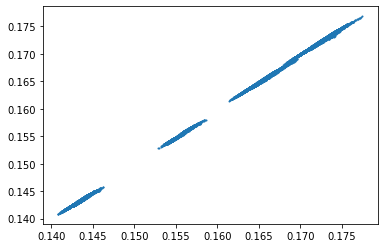

In [176]:
plt.scatter(X_train_principal.iloc[:,0], X_train_principal.iloc[:,1], s = 1 , alpha=1)

Accuracy: 0.72


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


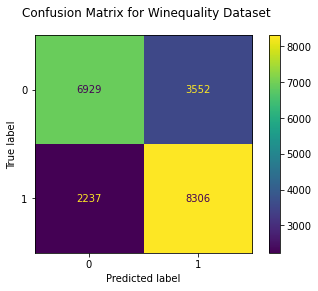

[1 1 1 ... 0 0 1]


In [192]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
mlp_clf = MLPClassifier(hidden_layer_sizes=(50, 20, 2),
                        max_iter = 300, activation='tanh',
                        solver = 'adam', alpha=1e-7, learning_rate='invscaling'
                        )
mlp_clf.out_activation_ = 'sigmoid'
mlp_clf.fit(X_tr, y_train)
y_pred = mlp_clf.predict(X_te)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
fig = plot_confusion_matrix(mlp_clf, X_te, y_test, display_labels=mlp_clf.classes_)
fig.figure_.suptitle("Confusion Matrix for Winequality Dataset")
plt.show()
print(y_pred)